In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
warnings.filterwarnings(action='ignore')

In [2]:
train_df = pd.read_csv('C:/Users/wpfke/OneDrive/문서/ML/open/train.csv')
test_df = pd.read_csv('C:/Users/wpfke/OneDrive/문서/ML/open/test.csv')

In [3]:
train_df.head(3)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A


In [4]:
test_df.head(3)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,TEST_00000,16800000,36 months,8 years,MORTGAGE,132000000,19.64,12,주택 개선,0,394692,146604.0,0.0,0.0
1,TEST_00001,8400000,36 months,5 years,RENT,89971200,15.84,25,부채 통합,0,0,0.0,0.0,0.0
2,TEST_00002,17280000,36 months,6 years,RENT,150000000,8.41,20,신용 카드,0,1786980,281820.0,0.0,0.0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


### 범주형 변수 그래프 그려보기

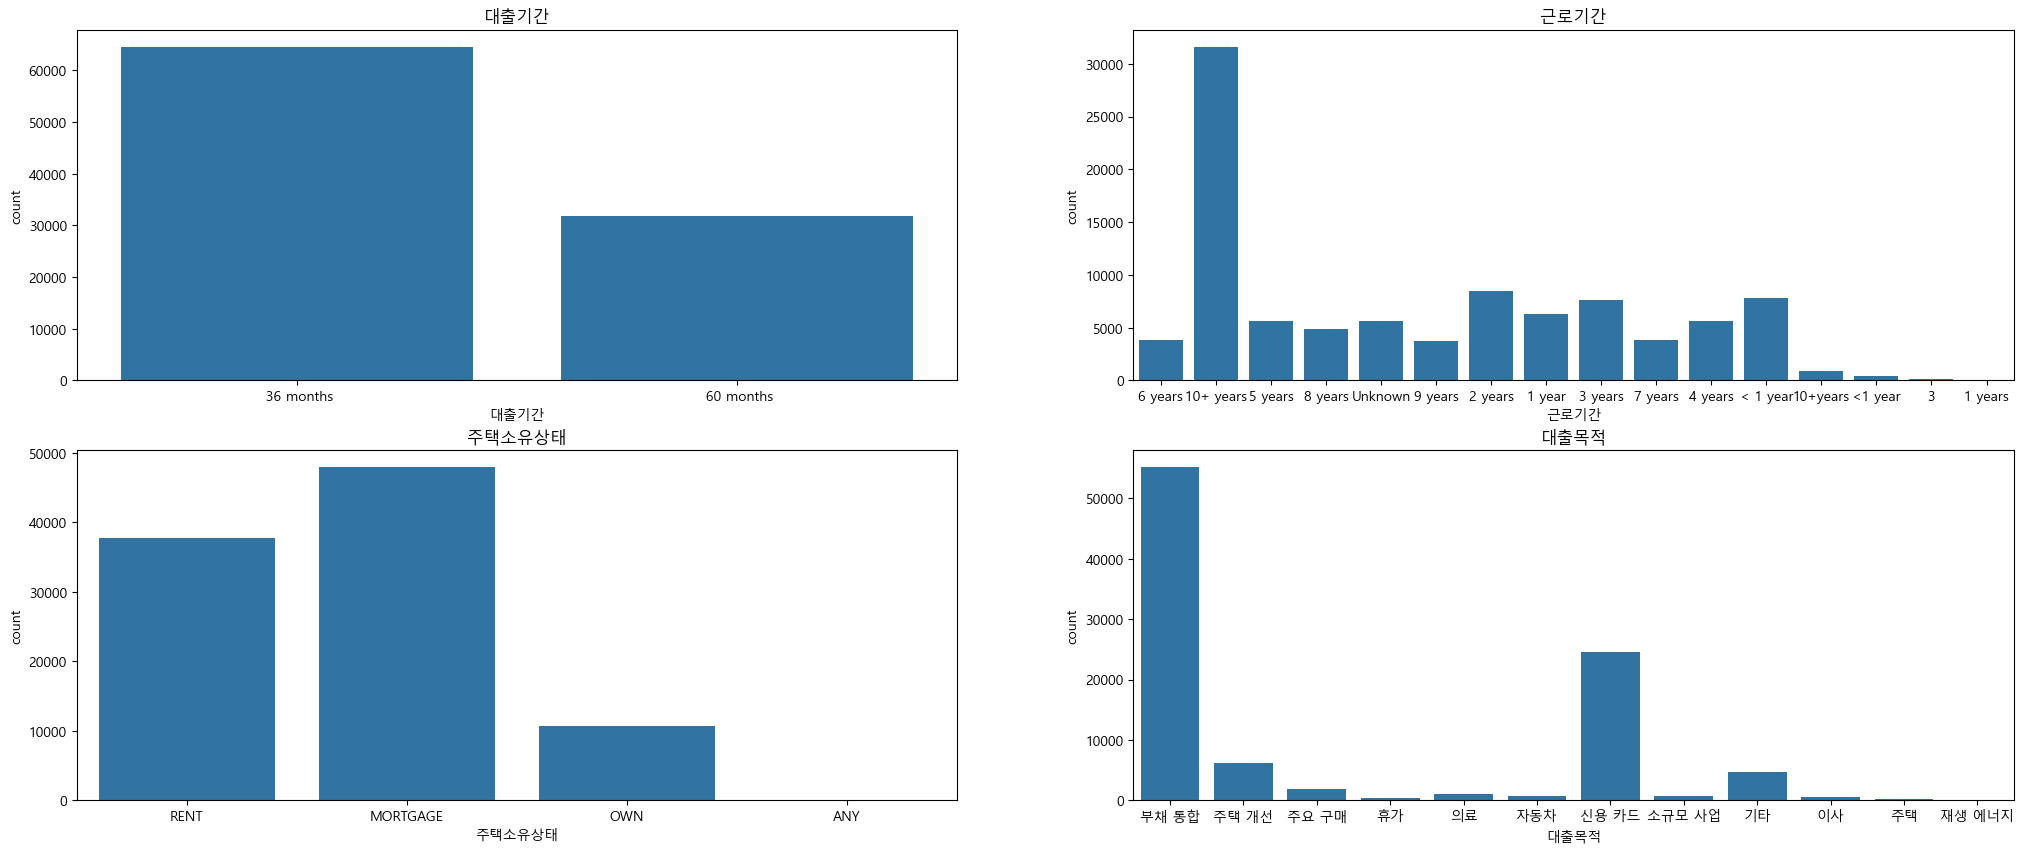

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(25,10))

sns.countplot(x = train_df['대출기간'], ax=axes[0][0]).set_title('대출기간')
sns.countplot(x = train_df['근로기간'], ax=axes[0][1]).set_title('근로기간')
sns.countplot(x = train_df['주택소유상태'], ax=axes[1][0]).set_title('주택소유상태')
sns.countplot(x = train_df['대출목적'], ax=axes[1][1]).set_title('대출목적')

plt.show()

In [7]:
target_column = '대출등급'

X = train_df.drop(columns = [target_column])
y = train_df[[target_column]]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3)

numeric_col = ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']
category_col = ['대출기간', '근로기간', '주택소유상태', '대출목적']

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(67405, 14) (28889, 14) (67405, 1) (28889, 1)


### x끼리 상관관계 (수치간의 변동성, 방향 보기)
 - mapping 유의할 것

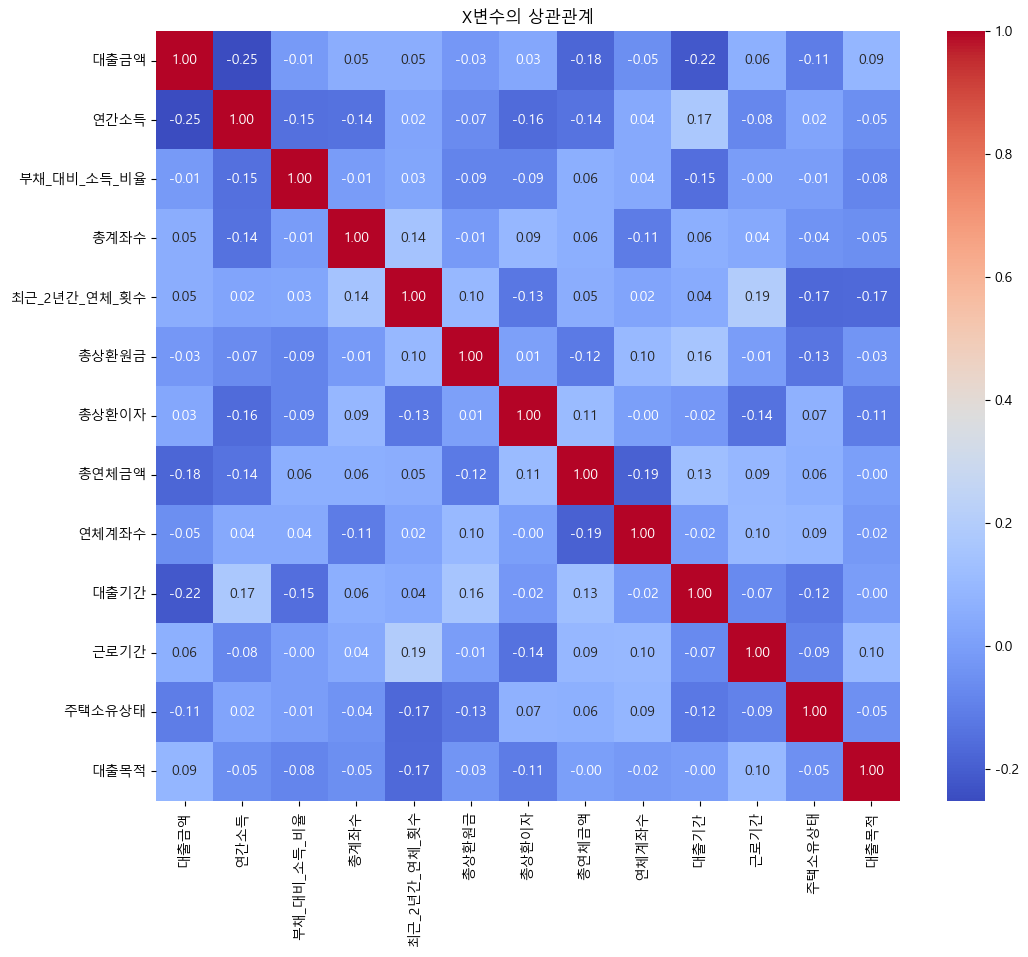

In [8]:
# 수치형 변수(randn)
numeric_cols = ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']
# 값이 너무 많기 때문에, 랜덤으로 100개의 데이터만 추출해서 샘플링 진행
numeric_data = np.random.randn(100, len(numeric_cols))
# 숫자형 데이터의 2차원 배열, 해당 데이터프레임의 열 이름을 정의하는 데이터프레임 생성
numeric_df = pd.DataFrame(numeric_data, columns=numeric_cols)

# 범주형 변수(randint)
categorical_cols = ['대출기간', '근로기간', '주택소유상태', '대출목적']
# 시각화, 인코딩의 편의성을 위해 0~2까지의 정수를 생성
# 크기는 100, 변수의 개수는 길이만큼인 2차원 배열
categorical_data = np.random.randint(0, 3, size=(100, len(categorical_cols)))
# 범주형 데이터의 2차원 배열, 해당 데이터프레임의 열 이름을 정의하는 데이터프레임 생성
categorical_df = pd.DataFrame(categorical_data, columns=categorical_cols)

# 상관관계 (numeric_cols)
numeric_corr = numeric_df.corr()

# 범주형 -> 수치형(더미 데이터) 상관관계 계산
dummy_categorical_df = pd.get_dummies(categorical_df)

# 범주형 변수(변환) + 수치형 변수
merged_df = pd.concat([numeric_df, dummy_categorical_df], axis=1)

# 모든 변수들 사이의 상관관계 계산
overall_corr = merged_df.corr()

# annot=True: 각 셀에 숫자 값 표시
# cmap='coolwarm': 히트맵의 색상
# fmt: 소수점
plt.figure(figsize=(12, 10))
sns.heatmap(overall_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('X변수의 상관관계')
plt.show()

In [9]:
# 수치형 변수의 상관관계
print(numeric_df.corr())
# 더미데이터로 변환된 범주형 변수의 상관관계
print(dummy_categorical_df.corr())
# 수치형 + 변환된 범주형 변수의 상관관계
print(merged_df.corr())

                  대출금액      연간소득  부채_대비_소득_비율      총계좌수  최근_2년간_연체_횟수  \
대출금액          1.000000 -0.252251    -0.013512  0.054523      0.054475   
연간소득         -0.252251  1.000000    -0.145524 -0.140550      0.020765   
부채_대비_소득_비율  -0.013512 -0.145524     1.000000 -0.012023      0.025410   
총계좌수          0.054523 -0.140550    -0.012023  1.000000      0.144158   
최근_2년간_연체_횟수  0.054475  0.020765     0.025410  0.144158      1.000000   
총상환원금        -0.025295 -0.066036    -0.086285 -0.014793      0.099249   
총상환이자         0.030810 -0.162521    -0.087561  0.093865     -0.128954   
총연체금액        -0.177775 -0.135944     0.059303  0.059443      0.054144   
연체계좌수        -0.052568  0.036560     0.037983 -0.113813      0.018210   

                 총상환원금     총상환이자     총연체금액     연체계좌수  
대출금액         -0.025295  0.030810 -0.177775 -0.052568  
연간소득         -0.066036 -0.162521 -0.135944  0.036560  
부채_대비_소득_비율  -0.086285 -0.087561  0.059303  0.037983  
총계좌수         -0.014793  0.093865  0.059443 -0.113

In [10]:
train_df.head(3)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A


In [11]:
X_train.describe(include = 'all')

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,67405,6.740500e+04,67405,67405,67405,6.740500e+04,67405.000000,67405.000000,67405,67405.000000,6.740500e+04,6.740500e+04,67405.000000,67405.000000
unique,67405,NaN,2,16,3,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN
top,TRAIN_42717,NaN,36 months,10+ years,MORTGAGE,NaN,NaN,NaN,부채 통합,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,45148,22133,33591,NaN,NaN,NaN,38690,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.831606e+07,NaN,NaN,NaN,9.377144e+07,19.252795,25.299132,NaN,0.349336,8.259179e+05,4.292798e+05,53.806038,0.005771
std,NaN,1.034541e+07,NaN,NaN,NaN,8.462993e+07,9.091606,12.106090,NaN,0.931287,1.064245e+06,4.418538e+05,1426.305294,0.080127
min,NaN,1.200000e+06,NaN,NaN,NaN,1.440000e+06,0.000000,4.000000,NaN,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,NaN,1.020000e+07,NaN,NaN,NaN,5.760000e+07,12.660000,17.000000,NaN,0.000000,3.078480e+05,1.353480e+05,0.000000,0.000000
50%,NaN,1.680000e+07,NaN,NaN,NaN,7.800000e+07,18.720000,24.000000,NaN,0.000000,5.986800e+05,2.873400e+05,0.000000,0.000000
75%,NaN,2.400000e+07,NaN,NaN,NaN,1.123200e+08,25.480000,32.000000,NaN,0.000000,1.055076e+06,5.702280e+05,0.000000,0.000000


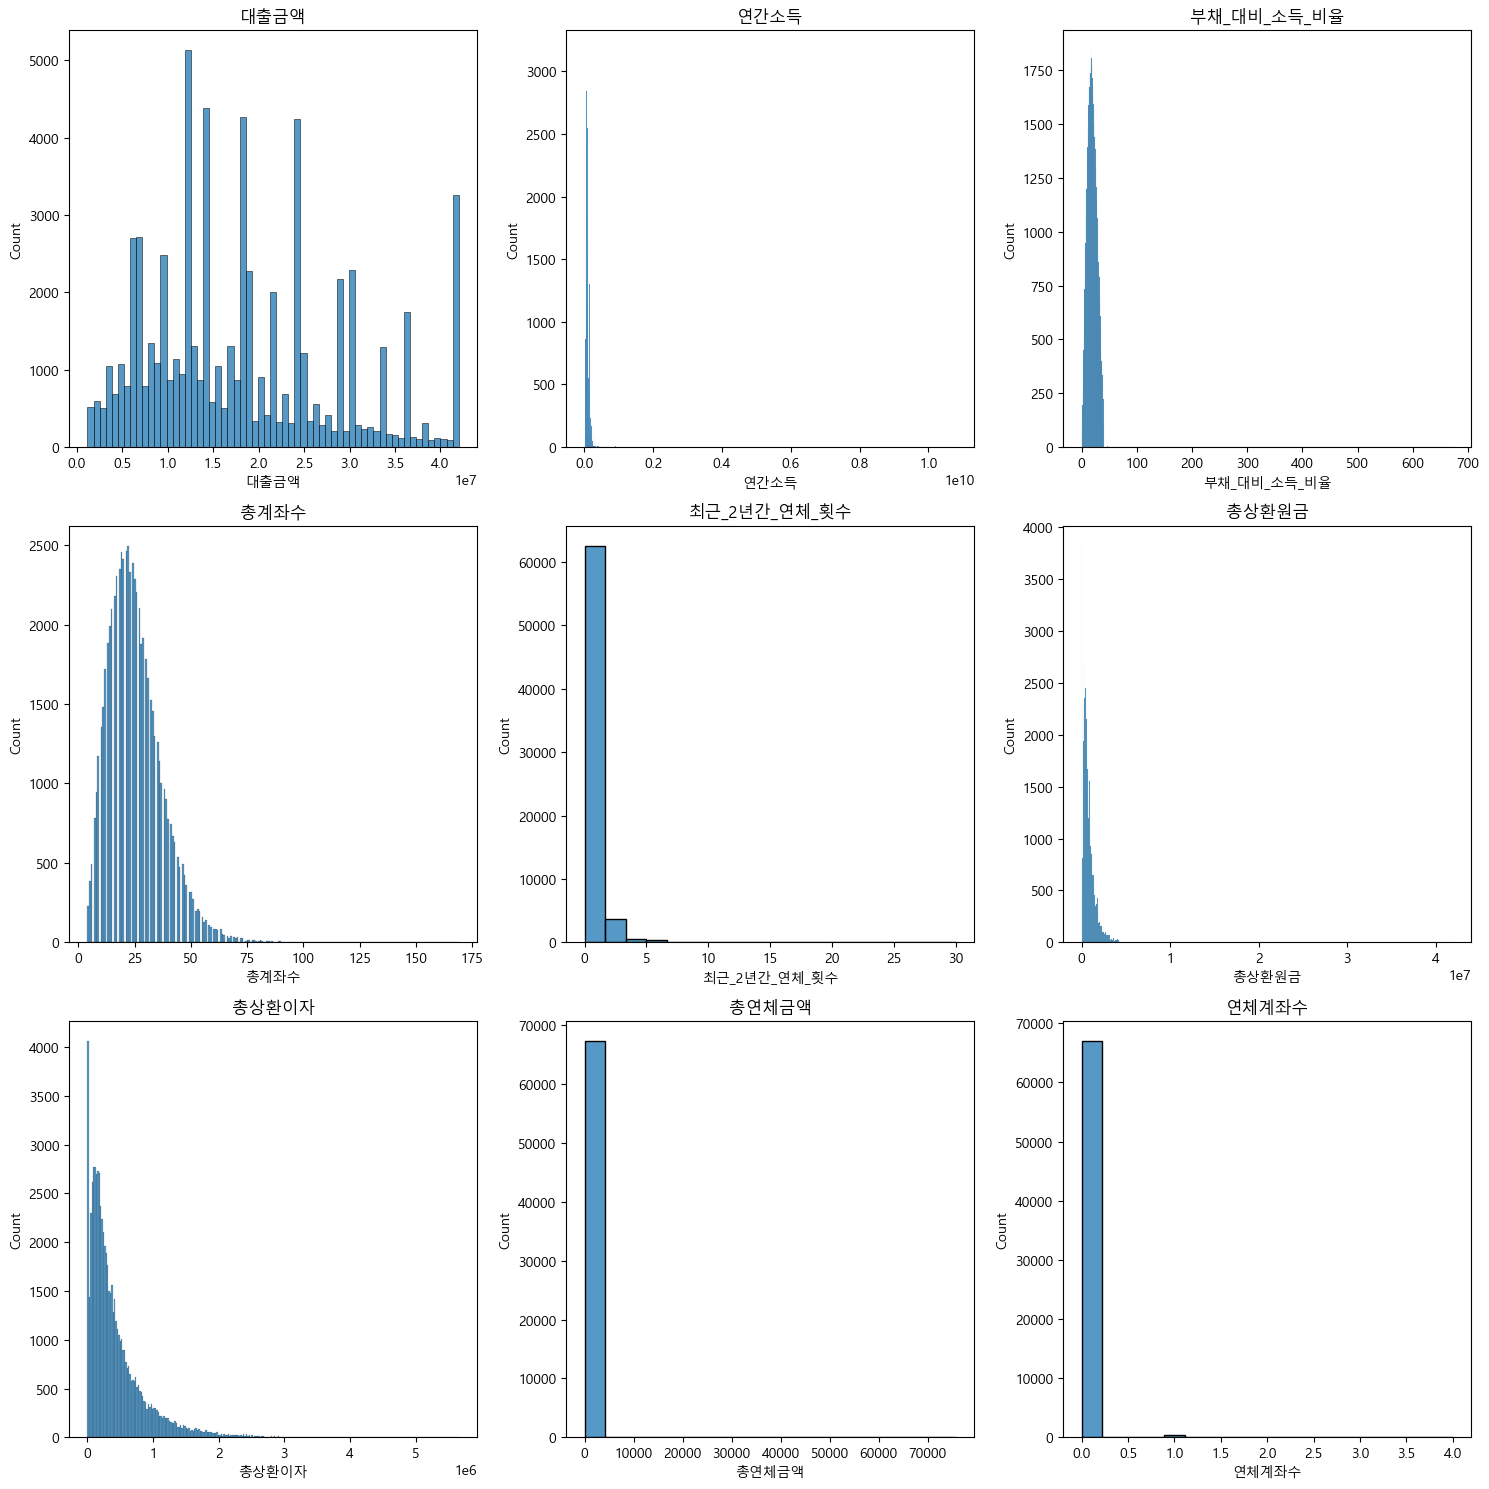

In [12]:
#수치형 변수 시각화
def get_3_hist(data:pd.DataFrame, columns:list):
    """ 데이터와 컬럼을 전달하면 히스토그램을 3개씩 출력해주는 함수

    Args:
        data (pd.DataFrame): 데이터프레임
        columns (list): 컬럼 리스트
    """
    plt.figure(figsize=(15, 5 * (len(columns) // 3)))

    for i, col in enumerate(columns):
        # 서브플롯 위치 설정
        plt.subplot(len(columns) // 3 + (len(columns) % 3 > 0), 3, i + 1)
        # 히스토그램 그리기
        sns.histplot(data[col])
        plt.title(col)

    # 전체 그림 표시
    plt.tight_layout()
    plt.show()
get_3_hist(X_train, numeric_col)

### 수치형 변수 이상치 제거
 - 부채_대비_소득_비율 : 4분위수 사용해서 이상치 제거
 - 연간소득 : 4분위수 사용해서 이상치 제거
 - 총상환원금 : 4분위수 사용해서 이상치 제거
 - 총상환이자 : 4분위수 사용해서 이상치 제거
 - 총계좌수 : 4분위수 사용해서 이상치 제거

In [13]:
# 이상치 제거할 컬럼 선택
IQR_columns = ['부채_대비_소득_비율', '연간소득', '총상환원금', '총상환이자', '총계좌수']

# 각 컬럼에 대한 이상치 제거
for col in IQR_columns:
    # 해당 컬럼의 1사분위수와 3사분위수 계산
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    
    # IQR 계산
    IQR = Q3 - Q1
    
    # 이상치를 식별하기 위한 상한값과 하한값 계산
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    # 이상치가 없는 데이터 선택
    train_df = train_df[(train_df[col] >= lower_bound) & (train_df[col] <= upper_bound)]


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79886 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            79886 non-null  object 
 1   대출금액          79886 non-null  int64  
 2   대출기간          79886 non-null  object 
 3   근로기간          79886 non-null  object 
 4   주택소유상태        79886 non-null  object 
 5   연간소득          79886 non-null  int64  
 6   부채_대비_소득_비율   79886 non-null  float64
 7   총계좌수          79886 non-null  int64  
 8   대출목적          79886 non-null  object 
 9   최근_2년간_연체_횟수  79886 non-null  int64  
 10  총상환원금         79886 non-null  int64  
 11  총상환이자         79886 non-null  float64
 12  총연체금액         79886 non-null  float64
 13  연체계좌수         79886 non-null  float64
 14  대출등급          79886 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 9.8+ MB


### Y변수(대출등급) 인코딩 적용
 - 대출등급: A, B, C, D, E, F, G 총 7개
 - 대출등급을 인코딩
 - A:6 , B:5, C:4, D:3, E:2, F:1, G:0

In [15]:
def get_grade(x:str):
    if x == 'A':
        return 6
    elif x == 'B':
        return 5
    elif x == 'C':
        return 4
    elif x == 'D':
        return 3
    elif x == 'E':
        return 2
    elif x == 'F':
        return 1
    elif x == 'G':
        return 0

# y_train 데이터 인코딩 코드
y_train['대출등급'] = y_train['대출등급'].apply(get_grade)
# y_test 데이터 인코딩코드
y_test['대출등급'] = y_test['대출등급'].apply(get_grade)

display(y_test[:10])

,대출등급
57104,4
42625,6
84000,5
19240,6
5174,4
16485,5
50826,4
85944,4
60915,4
67892,5


- 근로기간 : unknown = -1

In [16]:
# Unknown은 -1으로 대치
def get_period(x):
    if x in ['< 1 year', '<1 year']:
        return 0
    elif x in ['1 year','1 years']:
        return 1
    elif x == '2 years':
        return 2
    elif x == '3 years':
        return 3
    elif x == '4 years':
        return 4
    elif x=='5 years':
        return 5
    elif x=='6 years':
        return 6
    elif x=='7 years':
        return 7
    elif x=='8 years':
        return 8
    elif x=='9 years':
        return 9
    elif x in ['10+ years', '10+years']:
        return 10
    else:
        return -1
    
train_df['근로기간1'] = train_df['근로기간'].apply(lambda x: int(get_period(x)))

- 주택소유상태 : any 삭제

In [17]:
train_df['주택소유상태'].value_counts()

주택소유상태
MORTGAGE    38025
RENT        32959
OWN          8901
ANY             1
Name: count, dtype: int64

In [18]:
# 'ANY'인 값만 출력
train_df[train_df['주택소유상태'] == 'ANY']

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,근로기간1
28730,TRAIN_28730,41160000,36 months,10+ years,ANY,93600000,17.71,20,기타,0,0,0.0,0.0,0.0,C,10


In [19]:
# 'ANY'인 행을 전부 삭제
# axis = 0: 행 삭제, axis = 1: 열 삭제
train_df = train_df.drop(labels=28730, axis=0)
train_df = train_df.reset_index(drop=True)

### 범주형 데이터 전처리 - 인코딩
- label: 근로기간
- one-hot: 대출기간, 주택소유상태, 대출목적
- category_col = ['대출기간', '근로기간', '주택소유상태', '대출목적']

In [22]:
train_x2 = train_df.drop(columns=['ID', '근로기간', '대출등급'])
train_y2 = train_df['대출등급']

test_x2 = test_df.drop(columns=['ID', '근로기간'])

In [23]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ['대출기간', '주택소유상태', '대출목적']

for i in categorical_features:
    le = LabelEncoder()
    le=le.fit(train_x2[i]) 
    train_x2[i]=le.transform(train_x2[i])
    
    for case in np.unique(test_x2[i]):
        if case not in le.classes_: 
            le.classes_ = np.append(le.classes_, case) 
    test_x2[i]=le.transform(test_x2[i])
    
display(train_x2.head(3))
display(test_x2.head(3))

,대출금액,대출기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,근로기간1
0,12480000,0,2,72000000,18.90,15,1,0,0,0.0,0.0,0.0,6
1,14400000,1,0,130800000,22.33,21,10,0,373572,234060.0,0.0,0.0,10
2,12000000,0,0,96000000,8.60,14,1,0,928644,151944.0,0.0,0.0,5


,대출금액,대출기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,16800000,0,0,132000000,19.64,12,10,0,394692,146604.0,0.0,0.0
1,8400000,0,2,89971200,15.84,25,1,0,0,0.0,0.0,0.0
2,17280000,0,2,150000000,8.41,20,3,0,1786980,281820.0,0.0,0.0


In [20]:
oh_csr = oe.fit_transform(train_df[['대출기간', '주택소유상태', '대출목적']])
oh_csr_df = pd.DataFrame(oh_csr.toarray(), columns= oe.get_feature_names_out())
oh_csr_df.head(5)

,대출기간_ 36 months,대출기간_ 60 months,주택소유상태_MORTGAGE,주택소유상태_OWN,주택소유상태_RENT,대출목적_기타,대출목적_부채 통합,대출목적_소규모 사업,대출목적_신용 카드,대출목적_의료,대출목적_이사,대출목적_자동차,대출목적_재생 에너지,대출목적_주요 구매,대출목적_주택,대출목적_주택 개선,대출목적_휴가
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### 수치형 데이터 전처리 - 스케일링
- Standard
- MinMax 

In [24]:
sd_sc = StandardScaler()


In [25]:
# 부채_대비_소득_비율, 연간소득, 총상환원금, 총상환이자, 총계좌수에 대해 스케일링 수행
scaled_features = sd_sc.fit_transform(train_df[['부채_대비_소득_비율', '연간소득', '총상환원금', '총상환이자', '총계좌수']])

# 스케일링된 특성을 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_features, columns=['부채_대비_소득_비율', '연간소득', '총상환원금', '총상환이자', '총계좌수'])

# 스케일링된 데이터프레임 출력
print(scaled_df.head())


   부채_대비_소득_비율      연간소득     총상환원금     총상환이자      총계좌수
0    -0.051630 -0.234803 -1.348230 -1.227195 -0.841011
1     0.343146  1.373686 -0.536596 -0.303754 -0.268782
2    -1.237109  0.421723  0.669369 -0.627728 -0.936382
3    -0.490142  1.406512 -0.640335 -0.623135 -0.841011
4     0.695336 -0.242025 -0.851697 -0.639516 -0.459525


In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(train_x2, train_y2)

RandomForestClassifier()